## Assignment 1
Daniel Fylling

### Part 1: Data cleaning

In [118]:
import pandas as pd
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [119]:
df = pd.read_excel('a1_data1.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,Data
2,NaN,292.6
3,NaN,532.4
4,NaN,763.2


In [120]:
df = df.drop(df.index[0])
df = df.drop(df.columns[0], axis = 1)
df = df.rename(columns = df.iloc[0])
df = df.drop(df.index[0])
df = df.reset_index(drop = True)
df.head()

,Data
0,292.6
1,532.4
2,763.2
3,157.9593
4,176.84451


In [121]:
df.isnull().sum()


Data    10
dtype: int64

In [122]:
df = df.dropna()

In [123]:
df.isnull().sum()

Data    0
dtype: int64

### Part 2: Mean, Variance, Median, Mode and IQR

In [124]:
a  = np.asarray(list(df['Data']))
a.astype(float)
n = np.size(a)
print('a)')
print(n)
a_sum = np.sum(a)
print('b)')
print(a_sum)
a_avg = a_sum/n
print('c)')
print(a_avg)
a_mean = np.mean(a)
print('d)')
print(a_mean)

a)
290
b)
86306.47905
c)
297.6085484482758
d)
297.6085484482758


In [125]:
df2 = pd.read_excel('a1_data1.xlsx', sheet_name='Sheet2')
print('e)')
print(df2.isnull().sum())
print(np.mean(np.asarray(df2)))

e)
Data    10
dtype: int64
nan


The empty cells are treated as null values, and numpy cannot calculate using null values.

In [126]:
print('f)')
sum_sqrd_diff = np.sum(np.square(a)-np.square(a_mean))
print(sum_sqrd_diff)
print('g)')
a_var = sum_sqrd_diff/n
print('from basics:' , a_var)
print('from function:',np.var(a))
print('h)')
a_std = np.sqrt(a_var)
print('from basics:' , a_std)
print('from function:' , np.std(a))
print('i)')
print('Non-significant difference in lower decimals, maybe related to machine error')
print('j)')
a_median = np.median(a)
print(a_median)
a_mode = st.mode(a)[0]
print(a_mode)
q75, q25 = np.percentile(a, [75 ,25])
a_iqr = q75 - q25
print(a_iqr)

f)
6038806.326118128
g)
from basics: 20823.47009006251
from function: 20823.470090062496
h)
from basics: 144.30339597550196
from function: 144.3033959755019
i)
Non-significant difference in lower decimals, maybe related to machine error
j)
268.35458500000004
[63.06783]
171.1420475


### Part 3. Histogram

63.06783
864.16736
Min and max values are the very lowest and very highes values of the array / dataset.


(array([ 7., 20., 34., 41., 39., 34., 29., 23., 17., 11., 10.,  6.,  4.,
         4.,  2.,  3.,  1.,  3.,  0.,  2.]),
 array([ 63.06783  , 103.1228065, 143.177783 , 183.2327595, 223.287736 ,
        263.3427125, 303.397689 , 343.4526655, 383.507642 , 423.5626185,
        463.617595 , 503.6725715, 543.727548 , 583.7825245, 623.837501 ,
        663.8924775, 703.947454 , 744.0024305, 784.057407 , 824.1123835,
        864.16736  ]),
 <BarContainer object of 20 artists>)

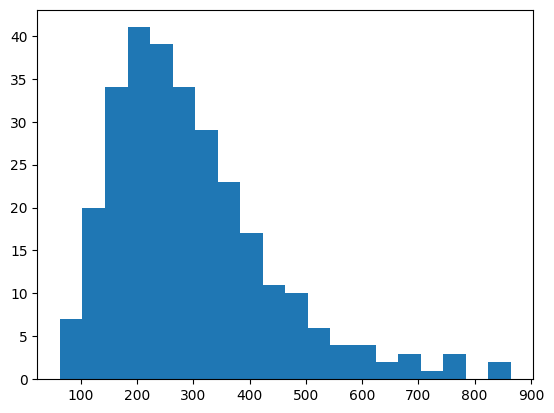

In [127]:
a_min = np.min(a)
print(a_min)
a_max = np.max(a)
print(a_max)
print('Min and max values are the very lowest and very highes values of the array / dataset.')
plt.hist(a, bins=20)


### Part 4: Data analysis

Text(0.5, 1.0, 'bins = 100')

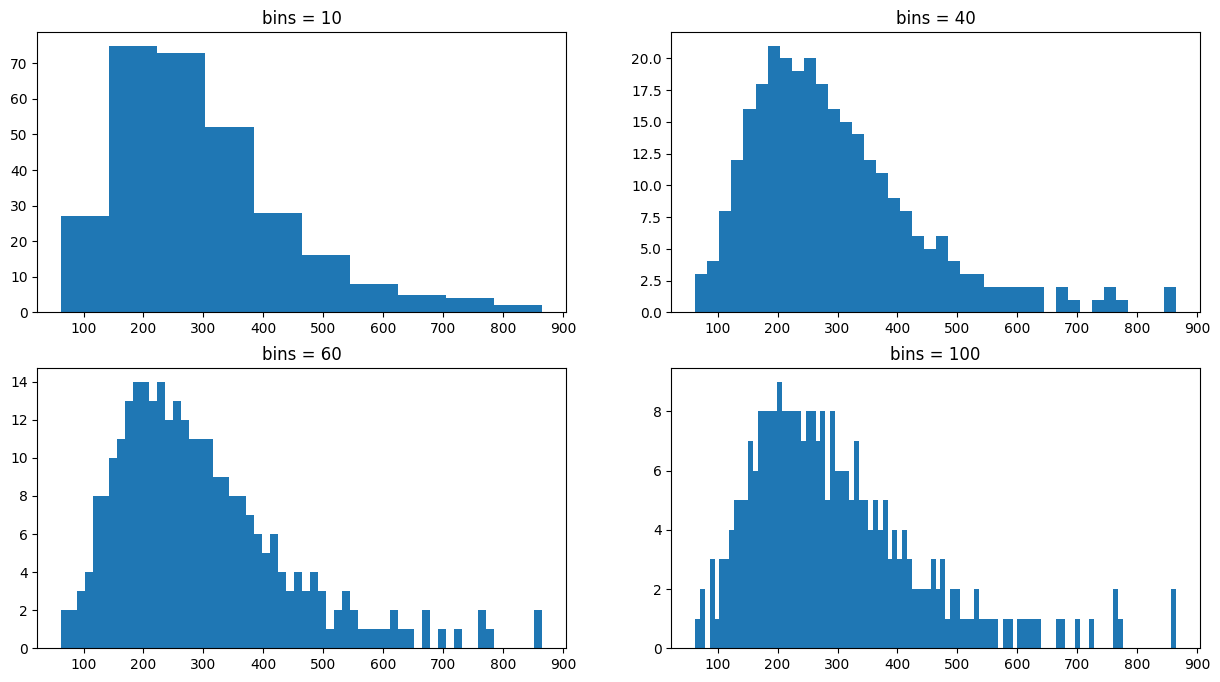

In [128]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.hist(a , bins = 10)
plt.title("bins = 10")

plt.subplot(2,2,2)
plt.hist(a , bins = 40)
plt.title("bins = 40")

plt.subplot(2,2,3)
plt.hist(a , bins = 60)
plt.title("bins = 60")

plt.subplot(2,2,4)
plt.hist(a , bins = 100)
plt.title("bins = 100")


In [129]:
print(st.describe(a))
print(q25)
print(a_median)
print(q75)


DescribeResult(nobs=290, minmax=(63.06783, 864.16736), mean=297.6085484482758, variance=20895.523619785898, skewness=1.2440592809302646, kurtosis=1.8589389415232747)
195.1241875
268.35458500000004
366.266235


### Part 5. PDF and CDF

[0.02413793 0.06896552 0.11724138 0.14137931 0.13448276 0.11724138
 0.1        0.07931034 0.05862069 0.03793103 0.03448276 0.02068966
 0.0137931  0.0137931  0.00689655 0.01034483 0.00344828 0.01034483
 0.         0.00689655]


Text(0.5, 1.0, 'PDF')

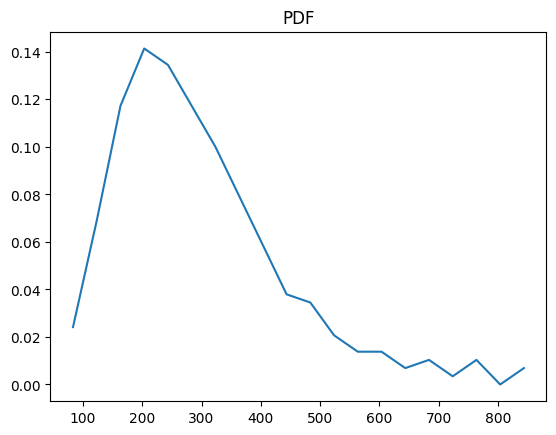

In [130]:
a_freq, bin_edges = np.histogram(a , bins = 20 )
bin_mps = (bin_edges[0:-1] + bin_edges[1:])*0.5
a_relfreq = a_freq/n
print(a_relfreq)
plt.plot(bin_mps , a_relfreq)
plt.title('PDF')

[0.02413793 0.09310345 0.21034483 0.35172414 0.4862069  0.60344828
 0.70344828 0.78275862 0.84137931 0.87931034 0.9137931  0.93448276
 0.94827586 0.96206897 0.96896552 0.97931034 0.98275862 0.99310345
 0.99310345 1.        ]


Text(0.5, 1.0, 'CDF')

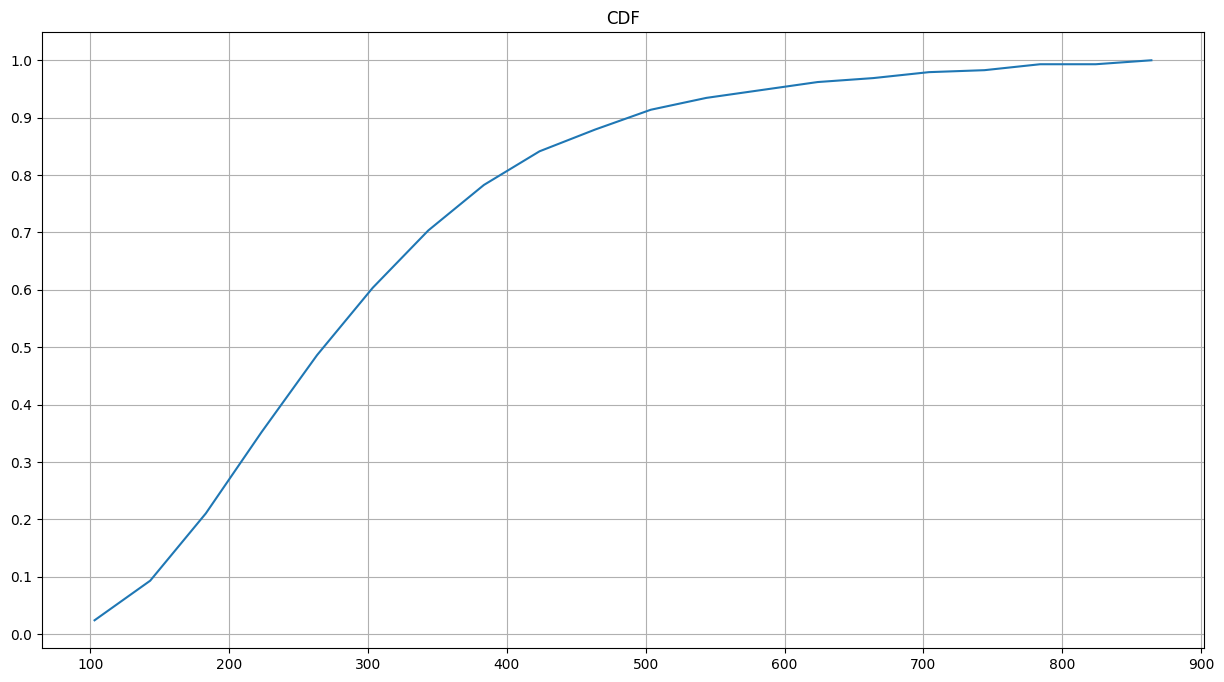

In [131]:
a_cdf = np.cumsum(a_relfreq)
print(a_cdf)

plt.figure(figsize=(15,8))

plt.plot(bin_edges[1:] , a_cdf)
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.grid()
plt.title('CDF')

a)
Generating a single bin '400-500', counting occurrences and dividing by total number of datapoints:

In [132]:
np.count_nonzero(a[np.logical_and(a>=400, a<=500)])/np.size(a)

0.10344827586206896

From the calculation we see that the relative frequency in the interval 400-500 is 10.3%. This can also be visually observed from the CDF graph, or by calculating the difference of cummulative frequency for the bin edges that were provided (linear interpolation used):

In [133]:
np.interp(500 , bin_edges[1:] , a_cdf)-np.interp(400 , bin_edges[1:] , a_cdf)

0.1037361570049724

b)
PDF peaks where CDF is steepest, which is also the Mode.

c)
Manually reading P10 = 150, P50 = 265, and P90 = 480.

**note that I used 'bin_edges[1:]' as my x-values rather than 'bin_mps', as that seems more correct to me. If plotting CDF curve against bin midpoints, then we would say thet 100% of the occurrences are at the midpoint of the last bin when we at the same time know for sure that the dataset contains higher values up to the final bin edge.*

In [134]:
np.percentile(a, [10, 50 ,90])

array([146.830934, 268.354585, 483.887452])

### Part 6: Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x19cd23b05d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19cd240fad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cd4e0b450>],
 'medians': [<matplotlib.lines.Line2D at 0x19cd1f26790>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cd1974510>],
 'means': []}

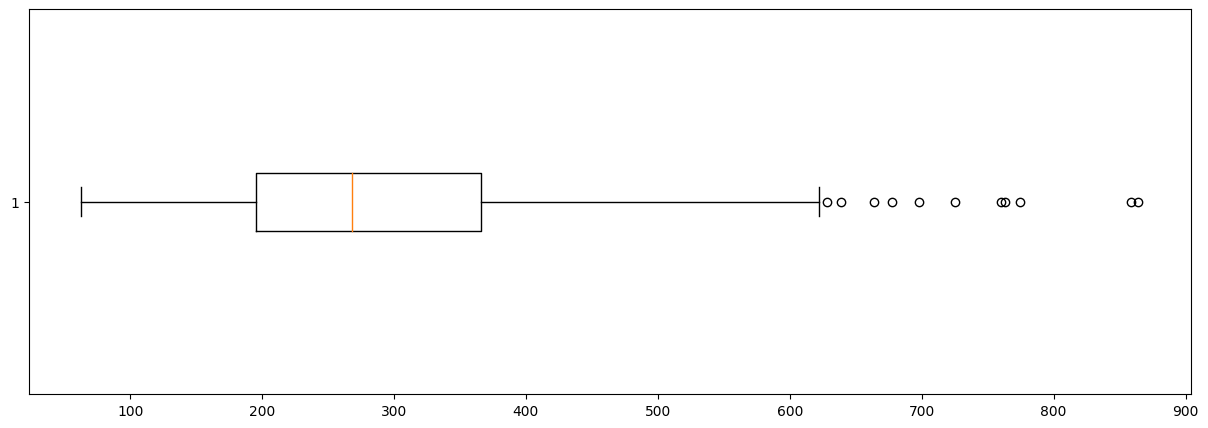

In [135]:
plt.figure(figsize=(15,5))
plt.boxplot(a, vert = False)

### Part 7: Q-Q and P-P plots

In [136]:
df3 = pd.read_excel('a1_qqpp_data.xlsx')
df3 = df3.drop(df3.index[:2])
df3 = df3.drop(df3.columns[0], axis = 1)
df3 = df3.rename(columns = df3.iloc[0])
df3 = df3.drop(df3.index[0])
df3 = df3.reset_index(drop = True)
df3.head()


,Med Sd Well 21-P,Med Sd Well 32-P,Fine Sd Well 21-P
0,16.8883,18.33272,14.88249
1,29.15465,19.09493,18.89656
2,17.9323,23.83011,11.78765
3,29.67166,27.1973,20.21119
4,34.23289,28.75427,13.03148


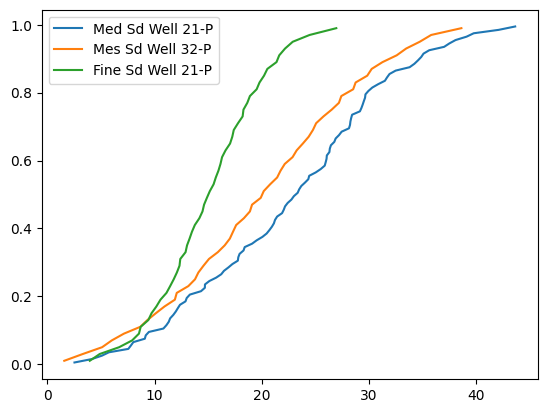

In [137]:
b  = np.asarray(list(df3['Med Sd Well 21-P'].dropna()))
n = len(b)
b_sort = np.sort(b)
F = (np.arange(n)+0.5)/n
plt.plot(b_sort, F, label='Med Sd Well 21-P')
M21_qq = np.interp(np.arange(0,1.01,0.01) , F , b_sort)
M21_pp = np.interp(np.arange(0,50,1) , b_sort , F)

b  = np.asarray(list(df3['Med Sd Well 32-P'].dropna()))
n = len(b)
b_sort = np.sort(b)
F = (np.arange(n)+0.5)/n
plt.plot(b_sort, F, label='Mes Sd Well 32-P')
M32_qq = np.interp(np.arange(0,1.01,0.01) , F , b_sort)
M32_pp = np.interp(np.arange(0,50,1) , b_sort , F)

b  = np.asarray(list(df3['Fine Sd Well 21-P'].dropna()))
n = len(b)
b_sort = np.sort(b)
F = (np.arange(n)+0.5)/n
plt.plot(b_sort, F, label='Fine Sd Well 21-P')
F21_qq = np.interp(np.arange(0,1.01,0.01) , F , b_sort)
F21_pp = np.interp(np.arange(0,50,1) , b_sort , F)

plt.legend()

Text(0, 0.5, 'Fine Sd Well 21-P [fraction]')

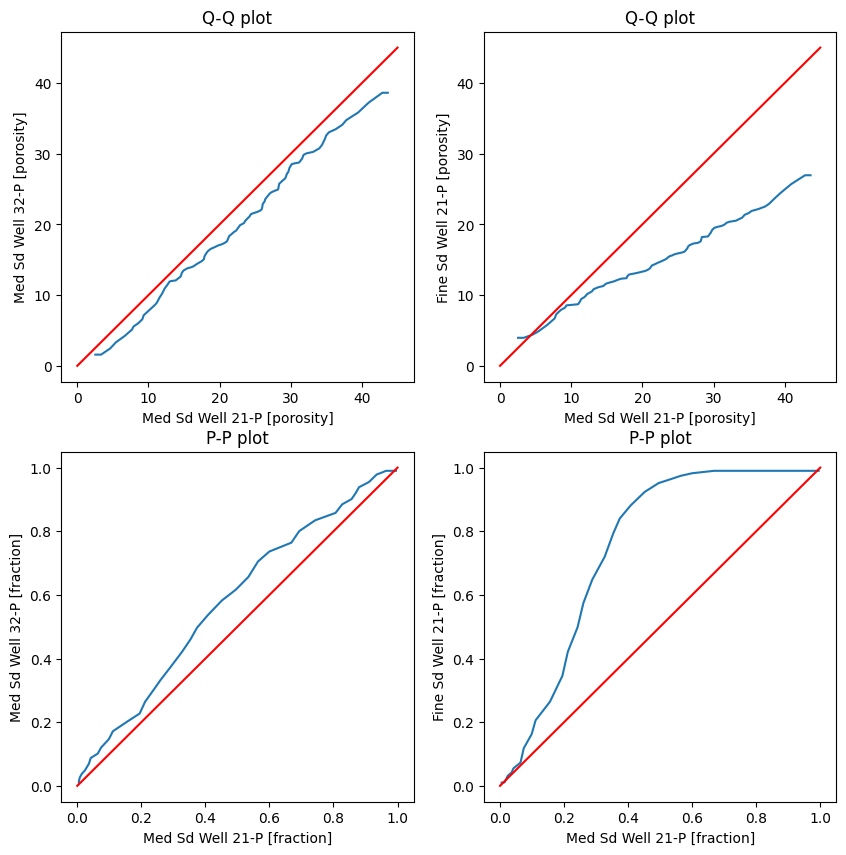

In [138]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(M21_qq, M32_qq)
plt.plot([0,45], [0,45], 'r-')
plt.title('Q-Q plot')
plt.xlabel('Med Sd Well 21-P [porosity]')
plt.ylabel('Med Sd Well 32-P [porosity]')

plt.subplot(2,2,2)
plt.plot(M21_qq, F21_qq)
plt.plot([0,45], [0,45], 'r-')
plt.title('Q-Q plot')
plt.xlabel('Med Sd Well 21-P [porosity]')
plt.ylabel('Fine Sd Well 21-P [porosity]')

plt.subplot(2,2,3)
plt.plot(M21_pp, M32_pp)
plt.plot([0,1], [0,1], 'r-')
plt.title('P-P plot')
plt.xlabel('Med Sd Well 21-P [fraction]')
plt.ylabel('Med Sd Well 32-P [fraction]')

plt.subplot(2,2,4)
plt.plot(M21_pp, F21_pp)
plt.plot([0,1], [0,1], 'r-')
plt.title('P-P plot')
plt.xlabel('Med Sd Well 21-P [fraction]')
plt.ylabel('Fine Sd Well 21-P [fraction]')

### Part 8: Bayes – Students

In [139]:
p_cc = 0.2
p_nh_cc = 0.5
p_dh = 0.01
p_nh_dh = 0.99

p_dh_nh = p_dh*p_nh_dh/(p_cc*p_nh_cc + p_dh*p_nh_dh)
p_dh_nh

0.09008189262966333

If a student was unable to submit the homework on time, the probability that a dog ate the homework is 9%.

### Part 9: Exploration Drilling

a) </br>
<img src="probability_tree.png" width=350>

b)</br>
As A and B seems connected one would think that the likelihood of finding oil in B is lower if no oil is found in A. However no information is given about this. Due to the conditionality given I think it would be wrong to default back to the original probabilities of 0.6 / 0.4 for B in the event we do not find oil in A. In a real life scenario I would ask the person who came up with the first conditional probability for B for help.